# Independent Validation

In this notebook, I will perform independent validation of my Graph Convolution Network based model. 

I validate my model and consequently the biomarkers I produce using the model on the TCGA BRCA multi-omics data set using the following three methods:
1. Generate biomarkers from both the data sets (TCGA BRCA & METABRIC) separately and then compare them
2. Train the model on TCGA BRCA data and then validate on METABRIC data
3. Train and test on METABRIC data but with only features selected from the TCGA BRCA data
4. Train the model on TCGA BRCA data, impute the other omics data for METABRIC data using TCGA BRCA, and then validate on the the imputed data

## Section 1: Biomarker comparison

In this section, we will generate biomarkers using our model and LIME on both the data sets and then compare the biomarker sets.

In [1]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd

In [2]:
# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = 42 

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 850
test_interval = 50
lr = 5e-4
weight_decay = 1e-3
dropout = 0.25
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = ["lime"]

### TCGA BRCA

In [13]:
RUN_TITLE = "TCGA BRCA mRNA Expression"
RUN_TITLE_SHORT = "tcga_brca_mrna"

# pre-processed data
mrna = "../R/TCGA BRCA/mrna_top1000.csv"
meta_csv = "../R/TCGA BRCA/PAM50_subtype.csv"
trte_partition_file = "../R/TCGA BRCA/trte_partition.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [ ]:
losses_tcga, metrics_tcga, feature_imp_tcga, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_tcga.to_csv("losses_tcga.csv")
metrics_tcga.to_csv("metrics_tcga.csv")
feature_imp_tcga["lime"].to_csv("tcga_features.csv", index_label="features")

2021-04-19 16:09:27.097552 

TCGA BRCA mRNA Expression
SEED =  42

Training...

Test: Epoch 0
Train Accuracy: 0.1770   Test ACC: 0.4837
Train F1: 0.1286         Test F1: 0.3154

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0191              0.1359              0.0000
Basal 	           0.2000              0.4306              0.1522              0.0000
Her2 	           0.2000              0.0957              0.0543              0.0000
LumA 	           0.2000              0.0000              0.4837              1.0000
LumB 	           0.2000              0.3397              0.1739              0.0000


Test: Epoch 50
Train Accuracy: 0.6153   Test ACC: 0.4457
Train F1: 0.6063         Test F1: 0.3306

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
-------------------------


Test: Epoch 600
Train Accuracy: 0.9522   Test ACC: 0.8424
Train F1: 0.9516         Test F1: 0.8436

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9856              0.1359              0.7200
Basal 	           0.2000              0.9713              0.1522              0.9643
Her2 	           0.2000              1.0000              0.0543              1.0000
LumA 	           0.2000              0.8421              0.4837              0.8652
LumB 	           0.2000              0.9617              0.1739              0.7188


Test: Epoch 650
Train Accuracy: 0.9416   Test ACC: 0.8533
Train F1: 0.9406         Test F1: 0.8569

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

### METABRIC

In [5]:
RUN_TITLE = "METABRIC mRNA Expression"
RUN_TITLE_SHORT = "metabric_mrna"

# pre-processed data
mrna = "../R/METABRIC/metabric_top1000.csv"
meta_csv = "../R/METABRIC/PAM50_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [8]:
losses_metabric, metrics_metabric, feature_imp_metabric, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_metabric.to_csv("losses_metabric.csv")
metrics_metabric.to_csv("metrics_metabric.csv")
feature_imp_metabric["lime"].to_csv("metabric_features.csv", index_label="features")

2021-04-19 15:56:17.313832 

TCGA BRCA mRNA Expression
SEED =  42

Training...

Test: Epoch 0
Train Accuracy: 0.1790   Test ACC: 0.2563
Train F1: 0.1319         Test F1: 0.1049

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0172              0.1508              0.0000
Basal 	           0.2000              0.5558              0.2141              0.0000
Her2 	           0.2000              0.0794              0.1538              0.0000
LumA 	           0.2000              0.0365              0.2563              1.0000
LumB 	           0.2000              0.2060              0.2251              0.0000


Test: Epoch 50
Train Accuracy: 0.8382   Test ACC: 0.7256
Train F1: 0.8388         Test F1: 0.7269

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
-------------------------


Test: Epoch 600
Train Accuracy: 0.9597   Test ACC: 0.7307
Train F1: 0.9593         Test F1: 0.7295

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9893              0.1508              0.5467
Basal 	           0.2000              0.9742              0.2141              0.6854
Her2 	           0.2000              0.9893              0.1538              0.6144
LumA 	           0.2000              0.8712              0.2563              0.9490
LumB 	           0.2000              0.9742              0.2251              0.7277


Test: Epoch 650
Train Accuracy: 0.9498   Test ACC: 0.7146
Train F1: 0.9490         Test F1: 0.7133

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

### Comparing Biomarkers

In [ ]:
# tcga = 
# metabric = 
# renaming the "lime scores" column to tcga and metabric

# Common biomarkers (out of the thousand each)
# biomarkers = inner_join

In [ ]:
# Intersection of the 1000 best features selected
# len(biomarkers)

In [ ]:
# Correlation of the common biomarkers
# Pearson correlation
# Spearman correlation

## Section 2: Testing on Independent Set

In this section, we will train the model on TCGA BRCA data and then validate the model on METABRIC data. To ensure that the feature set is the same in both the data sets, I have selected the best features using ANOVA on the BRCA data set and then removed the features not found in the METABRIC data set. This results in only removal of 5% of the originally selected features from the BRCA data set.

In [26]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd

# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = "random"

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 1000
test_interval = 50
lr = 5e-5
weight_decay = 5e-4
dropout = 0.50
adj_parameter = 5 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
feature_extract = []

In [27]:
RUN_TITLE = "TCGA Training & METABRIC Testing: mRNA Expression"
RUN_TITLE_SHORT = "tcga_metabric"

# pre-processed data
mrna = "../R/METABRIC/tcga_metabric_mrna.csv"
meta_csv = "../R/METABRIC/PAM50_tcga_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_tcga_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [ ]:
losses_tcga_metabric, metrics_tcga_metabric, features_tcga_metabric, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

losses_tcga_metabric.to_csv("losses_tcga_metabric.csv")
metrics_tcga_metabric.to_csv("metrics_tcga_metabric.csv")
#feature_tcga_metabric["lime"].to_csv("tcga_metabric_features.csv", index_label="features")

2021-04-19 20:52:40.094383 

TCGA Training & METABRIC Testing: mRNA Expression
SEED =  88074

Training...

Test: Epoch 0
Train Accuracy: 0.2034   Test ACC: 0.2470
Train F1: 0.1743         Test F1: 0.0978

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.0772              0.1044              0.0000
Basal 	           0.2000              0.2013              0.1662              0.0000
Her2 	           0.2000              0.1141              0.1205              0.0000
LumA 	           0.2000              0.0738              0.3619              0.0000
LumB 	           0.2000              0.5503              0.2470              1.0000


Test: Epoch 50
Train Accuracy: 0.4168   Test ACC: 0.3168
Train F1: 0.4151         Test F1: 0.2605

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accurac


Test: Epoch 600
Train Accuracy: 0.9396   Test ACC: 0.6280
Train F1: 0.9387         Test F1: 0.6340

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9597              0.1044              0.7404
Basal 	           0.2000              0.9933              0.1662              0.5650
Her2 	           0.2000              1.0000              0.1205              0.6958
LumA 	           0.2000              0.8121              0.3619              0.4674
LumB 	           0.2000              0.9329              0.2470              0.8252



<AxesSubplot:>

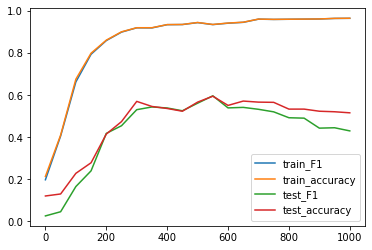

In [25]:
#metrics_tcga_metabric.head()
metrics_tcga_metabric.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])

## Section 3: METABRIC, but with features pre-selected from TCGA BRCA

In [20]:
# Loading necessary libraries and functions
import sys
sys.path.append('../')
from main import train_model
import pandas as pd

# Setting all variables for run
# SEED can be "random" or integer, if integer, it will be used as the seed for random, numpy, torch, and cuda
SEED = 42 

# change label from text to integer
label_dict = {'Normal':0, 'Basal':1, 'Her2':2, 'LumA':3, 'LumB':4}

COMBINER = False 
doSMOTE = True 

# Training parameters
num_epoch = 500
test_interval = 25
lr = 5e-4
weight_decay = 5e-4
dropout = 0.5
adj_parameter = 8 # average number of edge per node in adj matrix

VERBOSE = 1 #0, only print final result; 1, only testing result; 2, training and testing result
OUTPUT_FILES = False #Boolean to determine whether to output loss and metrics as csv files
MAKE_PLOTS = False #Boolean to determine whether to output loss and metrics as plots in png format
REPEATS = 1 #Integer, how many times to independently train the model
feature_extract = []

In [21]:
RUN_TITLE = "METABRIC mRNA Expression, but with TCGABRCA features"
RUN_TITLE_SHORT = "metabric_mrna"

# pre-processed data
mrna = "../R/METABRIC/metabric_mrna_common_genes.csv"
meta_csv = "../R/METABRIC/PAM50_metabric.csv"
trte_partition_file = "../R/METABRIC/trte_partition_metabric.txt"

load_list = [mrna, meta_csv, trte_partition_file]
GCN_names = ["mRNA"]

In [22]:
losses_metabric_preselected, metrics_metabric_preselected, _, _ = train_model(load_list=load_list, label_dict=label_dict, 
                                                              GCN_names=GCN_names, COMBINER=COMBINER,
        SEED=SEED, num_epoch=num_epoch, test_interval=test_interval, lr=lr, weight_decay=weight_decay, 
        dropout=dropout, adj_parameter=adj_parameter, VERBOSE=VERBOSE, doSMOTE = doSMOTE,
        RUN_TITLE=RUN_TITLE, RUN_TITLE_SHORT=RUN_TITLE_SHORT,
        OUTPUT_FILES=OUTPUT_FILES, MAKE_PLOTS=MAKE_PLOTS, feature_extract=feature_extract)

#losses_tcga_metabric.to_csv("losses_tcga_metabric.csv")
#metrics_tcga_metabric.to_csv("metrics_tcga_metabric.csv")
#feature_tcga_metabric["lime"].to_csv("tcga_metabric_features.csv", index_label="features")

2021-04-29 10:52:17.203836 

METABRIC mRNA Expression, but with TCGABRCA features
SEED =  42

Training...

Test: Epoch 0
Train Accuracy: 0.2094   Test ACC: 0.2563
Train F1: 0.1580         Test F1: 0.1046

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.5451              0.1508              0.0000
Basal 	           0.2000              0.1137              0.2141              0.0000
Her2 	           0.2000              0.3412              0.1538              0.0000
LumA 	           0.2000              0.0258              0.2563              1.0000
LumB 	           0.2000              0.0215              0.2251              0.0000


Test: Epoch 25
Train Accuracy: 0.5146   Test ACC: 0.5588
Train F1: 0.4917         Test F1: 0.5375

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accurac


Test: Epoch 300
Train Accuracy: 0.9258   Test ACC: 0.7005
Train F1: 0.9253         Test F1: 0.7019

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	           0.2000              0.9528              0.1508              0.5600
Basal 	           0.2000              0.9742              0.2141              0.6808
Her2 	           0.2000              0.9914              0.1538              0.5817
LumA 	           0.2000              0.8197              0.2563              0.9059
LumB 	           0.2000              0.8906              0.2251              0.6607


Test: Epoch 325
Train Accuracy: 0.9391   Test ACC: 0.7085
Train F1: 0.9387         Test F1: 0.7099

Label        Train Distribution     Train Accuracy     Test Distribution     Test Accuracy
------------------------------------------------------------------------------------------
Normal 	  

In [ ]:
metrics_metabric_preselected.plot(y = ["train_F1", "train_accuracy", "test_F1", "test_accuracy"])

<AxesSubplot:>

## Section 4: Testing on Independent Imputed Set

In this section, we will again train the model on TCGA BRCA data, but instead of training on only the single omics (gene expression) that is present in both data sets, I will use a modified METABRIC data set where the missing omics (DNA Methylation and miRNA expression) are imputed using the TCGA BRCA data. Thus, this will be a multi-omic validation.